In [61]:
import pandas as pd
import csv
import itertools
import matplotlib.pyplot as plt

In [62]:
"""
CHUNK_SIZE = 1000 # Number of rows to read at a time
header_written = False

with open("behavior_log.csv", "r") as in_file:
    reader = csv.reader(in_file)
    header = next(reader)

    with open("buy_behavior_log.csv", "a", newline='') as out_file:
        writer = csv.writer(out_file)
        if not header_written:
            writer.writerow(header)
            header_written = True

        chunk = []
        for i, row in enumerate(reader):
            if row[2] == "buy":
                chunk.append(row)
            if (i + 1) % CHUNK_SIZE == 0:
                writer.writerows(chunk)
                chunk = []
        writer.writerows(chunk)
#In this code, the CHUNK_SIZE variable determines the number of rows to be read and processed at a time.
# Use this code to generate buy_behaviour_log.csv file.
"""


'\nCHUNK_SIZE = 1000 # Number of rows to read at a time\nheader_written = False\n\nwith open("behavior_log.csv", "r") as in_file:\n    reader = csv.reader(in_file)\n    header = next(reader)\n\n    with open("buy_behavior_log.csv", "a", newline=\'\') as out_file:\n        writer = csv.writer(out_file)\n        if not header_written:\n            writer.writerow(header)\n            header_written = True\n\n        chunk = []\n        for i, row in enumerate(reader):\n            if row[2] == "buy":\n                chunk.append(row)\n            if (i + 1) % CHUNK_SIZE == 0:\n                writer.writerows(chunk)\n                chunk = []\n        writer.writerows(chunk)\n#In this code, the CHUNK_SIZE variable determines the number of rows to be read and processed at a time.\n# Use this code to generate buy_behaviour_log.csv file.\n'

In [63]:
#ad_feature = pd.read_csv('PycharmProjects/SPML/ad_feature.csv')
ad_feature = pd.read_csv('ad_feature.csv')

In [64]:
#raw_sample = pd.read_csv('PycharmProjects/SPML/raw_sample.csv')
raw_sample = pd.read_csv('raw_sample.csv')

In [65]:
#user_behavior_log = pd.read_csv('PycharmProjects/SPML/buy_behavior_log.csv')
buy_behavior = pd.read_csv('buy_behavior_log.csv')


In [66]:
#user_profile = pd.read_csv('PycharmProjects/SPML/user_profile.csv')

user_profile = pd.read_csv('user_profile.csv')

unique_age_levels = user_profile["age_level"].unique()

# Print the unique values of age_level
print(user_profile.columns)

user_profile.head(5)

Index(['userid', 'cms_segid', 'cms_group_id', 'final_gender_code', 'age_level',
       'pvalue_level', 'shopping_level', 'occupation',
       'new_user_class_level '],
      dtype='object')


,userid,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level
0,234,0,5,2,5,NaN,3,0,3.0
1,523,5,2,2,2,1.0,3,1,2.0
2,612,0,8,1,2,2.0,3,0,NaN
3,1670,0,4,2,4,NaN,1,0,NaN
4,2545,0,10,1,4,NaN,3,0,NaN


In [67]:
buy_behavior.head(5)

,user,time_stamp,btag,cate,brand
0,916958,1493811673,buy,123,97176
1,916958,1493811809,buy,123,97176
2,628854,1493781424,buy,4262,370203
3,623496,1493810730,buy,4262,370203
4,1099015,1493774927,buy,9390,347564


In [68]:
unique_brands = buy_behavior["brand"].unique()
print(len(unique_brands))

206307


255


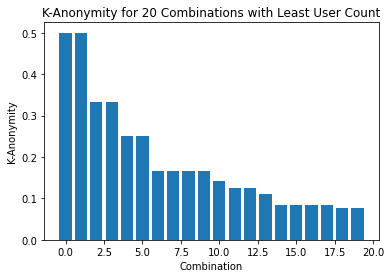

In [87]:
###### Identification attack user_groups ######

user_features = user_profile[['cms_segid', 'cms_group_id', 'final_gender_code', 'age_level', 'pvalue_level', 'shopping_level', 'occupation', 'new_user_class_level ']]

# Drop rows with missing values
user_features = user_features.dropna()

# Get all possible combinations of the user features
combinations = []
for i in range(1, len(user_features.columns)+1):
    combinations += list(itertools.combinations(user_features.columns, i))
    
print(len(combinations))

combinations_count = {}
for combination in combinations:
    combination_count = len(user_features.groupby(list(combination)).size())
    combinations_count[combination] = combination_count

# Create a list of tuples from the dictionary items
counts_list = list(combinations_count.items())

# Sort the list by the count of users in ascending order
counts_list.sort(key=lambda x: x[1])

# Get the top 20 combinations with the least count
top_combinations = counts_list[:20]

# Create a list of the K-anonymity values for each combination
k_anonimity = [1/count[1] for count in top_combinations]

# Plot the K-anonymity values as a bar chart
plt.bar(range(len(k_anonimity)), k_anonimity)

# Add labels to the x and y axis and add a title to the plot
plt.xlabel('Combination')
plt.ylabel('K-Anonymity')
plt.title('K-Anonymity for 20 Combinations with Least User Count')

# Show the plot
plt.show()

In [69]:
clicks_brand = pd.merge(raw_sample, ad_feature[['brand', 'adgroup_id']], how='left', on='adgroup_id')

In [70]:
clicks_with_brand = pd.merge(left=raw_sample, right=ad_feature, how='inner', on='adgroup_id')

age_level    0      1       2       3       4      5     6
brand                                                     
224985      13   1563    6653   12724   11363   7732   751
247789      23   3422   10764   19509   17115  11737  1265
370203     116  49809  170628  196661  129074  93324  7336
388700      29  13554   43388   48397   28786  21409  1902
425589      26   1584    5714   10794    9327   7659   899


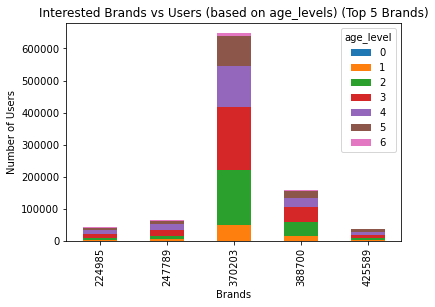

In [71]:
clicks_user_brand = pd.merge(clicks_brand, user_profile[['final_gender_code', 'age_level', 'userid']], how='left',
                             left_on='user', right_on='userid')
#filter out columns not required
#join columns with behavior log and user datasets

top_5_brands = buy_behavior['brand'].value_counts().head(5).index.tolist()
top_5_buy_behavior = buy_behavior[buy_behavior['brand'].isin(top_5_brands)]


# Merge the top_5_buy_behavior and user_profile dataframes on the 'userid' column
merged_df = pd.merge(top_5_buy_behavior, user_profile, left_on='user', right_on='userid')


# Group the merged dataframe by the 'age_level' and 'brand' columns and get the count of each group
grouped_df = merged_df.groupby(['age_level', 'brand'], as_index=False).count()[['age_level', 'brand', 'user']]


# Pivot the grouped dataframe to create a pivot table with the 'age_level' column as the index, the 'brand' column as the columns and the 'user' column as the values
pivot_table = grouped_df.pivot(index='brand', columns='age_level', values='user')
print(pivot_table)

# Plot the pivot table as a bar plot
pivot_table.plot(kind='bar', stacked=True)

# Add labels to the x and y axis and add a title to the plot
plt.xlabel('Brands')
plt.ylabel('Number of Users')
plt.title('Interested Brands vs Users (based on age_levels) (Top 5 Brands)')

# Show the plot
plt.show()













In [72]:
###### Following is a table generated that shows for top 5 brands how each age group interacts with each brand #########
##### Using this information we can create dummy figure 4  #####


# Get the total number of users for each age level
brand_totals = pivot_table.sum(axis=1)

# Divide the values in the pivot table by the age level totals and multiply by 100 to get the percent values
percent_table = (pivot_table / brand_totals.values.reshape(-1, 1)) * 100

# Round the values in the percent table to 2 decimal places
percent_table = percent_table.round(2)

# Print the percent table
print(percent_table)

age_level     0     1      2      3      4      5     6
brand                                                  
224985     0.03  3.83  16.31  31.19  27.85  18.95  1.84
247789     0.04  5.36  16.86  30.56  26.81  18.39  1.98
370203     0.02  7.70  26.37  30.40  19.95  14.43  1.13
388700     0.02  8.61  27.55  30.74  18.28  13.60  1.21
425589     0.07  4.40  15.87  29.98  25.91  21.27  2.50


final_gender_code       1       2
brand                            
224985              11610   29189
247789              15143   48692
370203             236395  410553
388700              69653   87812
425589              13812   22191


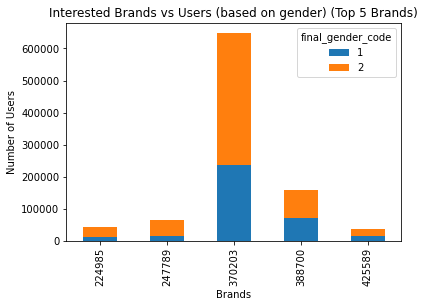

In [73]:
# Filter the behavior log to only include the rows where the brand was one of the top 5 purchased brands
top_5_brands = buy_behavior['brand'].value_counts().head(5).index.tolist()
top_5_buy_behavior = buy_behavior[buy_behavior['brand'].isin(top_5_brands)]

# Merge the top_5_buy_behavior and user_profile dataframes on the 'userid' column
merged_df = pd.merge(top_5_buy_behavior, user_profile, left_on='user', right_on='userid')

# Group the merged dataframe by the 'brand' and 'final_gender_code' columns and get the count of each group
grouped_df = merged_df.groupby(['brand', 'final_gender_code'], as_index=False).count()[['brand', 'final_gender_code', 'user']]

# Pivot the grouped dataframe to create a pivot table with the 'brand' column as the index, the 'final_gender_code' column as the columns and the 'user' column as the values
pivot_table = grouped_df.pivot(index='brand', columns='final_gender_code', values='user')
print(pivot_table)

# Plot the pivot table as a bar plot
pivot_table.plot(kind='bar', stacked=True)

# Add labels to the x and y axis and add a title to the plot
plt.xlabel('Brands')
plt.ylabel('Number of Users')
plt.title('Interested Brands vs Users (based on gender) (Top 5 Brands)')

# Show the plot
plt.show()

In [74]:
# Pivot the grouped dataframe to create a pivot table with the 'final_gender_code' column as the index, the 'brand' column as the columns and the 'user' column as the values
pivot_table = grouped_df.pivot(index='brand', columns='final_gender_code', values='user')

# Get the total number of users for each gender
brand_totals = pivot_table.sum(axis=1)

# Divide the values in the pivot table by the gender totals and multiply by 100 to get the percent values
percent_table = (pivot_table / brand_totals.values.reshape(-1, 1)) * 100

# Round the values in the percent table to 2 decimal places
percent_table = percent_table.round(2)

# Print the percent table
print(percent_table)

final_gender_code      1      2
brand                          
224985             28.46  71.54
247789             23.72  76.28
370203             36.54  63.46
388700             44.23  55.77
425589             38.36  61.64


In [75]:
brands = clicks_user_brand.brand.unique()

In [76]:
print((clicks_user_brand.age_level.unique()))
age_levels = [x for x in clicks_user_brand.age_level.unique() if x==x]
age_levels.sort()
print(age_levels)

[ 2. nan  5.  3.  4.  6.  1.  0.]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]


In [77]:
print(len(brands))

99815


In [78]:
print(len(brands))

99815


In [79]:
#brand_id : [count of brand query for each age group]
#debug
brand_count = {}
for brand in brands[:2]:
    print(brand)
    brand_clicks = clicks_user_brand.loc[clicks_user_brand['brand'] == brand]
    total_queries = brand_clicks[brand_clicks['age_level'].isin(age_levels)].shape[0]
    age_perc_list =[]
    for age_level in age_levels:
        queries_from_age = clicks_user_brand.loc[clicks_user_brand['age_level'] == age_level].shape[0]
        age_percentage = (queries_from_age/total_queries)*100
        age_perc_list.append(age_percentage)
    brand_count[brand = age_perc_list]
    

SyntaxError: invalid syntax (<ipython-input-79-d128c773e28c>, line 13)

In [80]:
print(brand_count)

NameError: name 'brand_count' is not defined

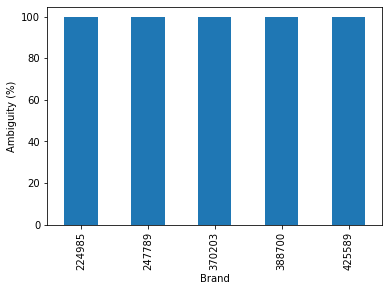

In [81]:
####### Generating figure 5 results #########

df = pd.merge(buy_behavior, user_profile, left_on="user", right_on="userid")

# Get the top 5 brands
top_brands = df["brand"].value_counts().nlargest(5).index.tolist()

# Filter the DataFrame to only include the top 5 brands
df = df[df["brand"].isin(top_brands)]

# Create a pivot table to get the age_level frequency for each brand
pivot_table = pd.pivot_table(df, values="user", index="brand", columns="age_level", aggfunc="count")

# Normalize the pivot table to get the percentage of each age_level for each brand
normalized_table = pivot_table.div(pivot_table.sum(axis=1), axis=0)

# Calculate the ambiguity for each brand
ambiguity = 100 - normalized_table.max(axis=1)

# Plot the ambiguity as a bar chart
ambiguity.plot(kind="bar")

# Add labels to the x-axis and y-axis
plt.xlabel("Brand")
plt.ylabel("Ambiguity (%)")

# Show the plot
plt.show()